This code is to get data from biznesradar.pl and analyze stocks.

In [31]:
# download libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly as py
py.offline.init_notebook_mode(connected=True)

from plotly.offline import iplot
import plotly as py

# import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
# cf.go_offline()

pd.options.display.max_columns = 100   # set the maximum columns to display
pd.options.display.max_rows = 100   # set the maximum rows to display

In [32]:
# list of stocks in biznesradar 
lista_spolek = pd.read_csv('biznesradar_stocks_parameters.csv', sep=',')
# display(lista_spolek.head(5))

# define the search string
search = 'projekt'  # Replace 'syn' with your desired value, or 'all_stocks' to get all rows

# Check if search is 'all_stocks' or something else
if search == 'all_stocks':
    lista_spolek_import = lista_spolek  # Return all rows
else:
    lista_spolek_import = lista_spolek[lista_spolek['Stock Parameter'].str.contains(search, case=False, na=False)]

# display the filtered or full data
display(lista_spolek_import)


,Ticker,Stock Parameter
134,CDR (CDPROJEKT),CD-PROJEKT


In [33]:
# spółka do analizy
if search == 'all_stocks':
    Spolka = 'SYNEKTIK' # podaj nazwę spółki
else:
    Spolka = lista_spolek_import['Stock Parameter'].values[0]

#Akcjonariat

In [34]:
table_Akcjonariat = pd.read_html('https://www.biznesradar.pl/akcjonariat/{}'.format(Spolka))
table_Akcjonariat = table_Akcjonariat[0]

# display(table_Akcjonariat.head(5))
# display(table_Akcjonariat.tail(5))


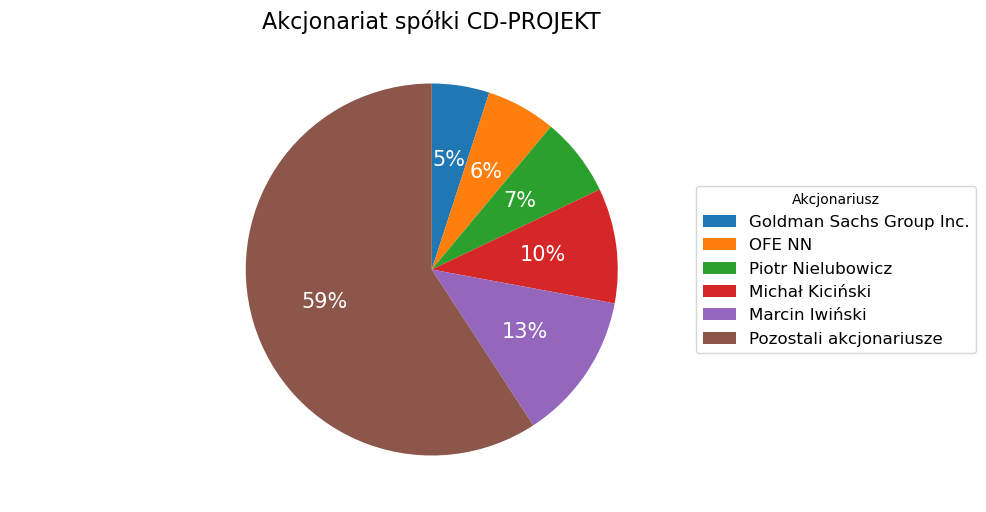

In [35]:


# Set index to 'Akcjonariusz'
table_Akcjonariat = table_Akcjonariat.set_index('Akcjonariusz')

# Drop row with 'razem' if it exists
table_Akcjonariat = table_Akcjonariat.drop(index='razem', errors='ignore')

# Extract numerical values from 'Udział' column and convert to float
table_Akcjonariat['Udział'] = table_Akcjonariat['Udział'].str.split(' ').str[0].astype(float)

# Create a series for plotting
series = pd.Series(table_Akcjonariat['Udział'] / 100, name='Udział [%]')

# Calculate the remaining percentage to make the total 100%
remaining = 1 - series.sum()

# Replace the 'razem' (if exists) with the remaining percentage, otherwise append it 
series['Pozostali akcjonariusze'] = remaining

# Sort pie chart in descending order (highest to lowest)
series = series.sort_values(ascending=True)

# Plot pie chart (force clockwise direction)
fig, ax = plt.subplots(figsize=(6, 7))  # Adjust width to give space for the legend
wedges, texts, autotexts = ax.pie(
    series, 
    labels=series.index,  # Ensure correct labels
    autopct='%.0f%%', 
    textprops={'color': 'w', 'fontsize': 14}, 
    startangle=90,  # Start from top (12 o'clock)
    counterclock=False  # Force clockwise order
)

# Adjust the font size for the percentage text inside the pie chart
for autotext in autotexts:
    autotext.set_fontsize(15)  # Adjust the font size for the percentage text

# Move the legend to the right of the pie chart
ax.legend(
    wedges,  # Keep colors consistent
    series.index,  
    title="Akcjonariusz",
    fontsize=12,
    loc="center left",  # Align it to the center left of the plot area
    bbox_to_anchor=(1.05, 0.5)  # Position the legend to the right of the pie chart (adjust as needed)
)

plt.title(f'Akcjonariat spółki {Spolka}', fontsize=16)  # Adjust title size
plt.show()



In [ ]:
#testmrogi


# Przetwarzanie tabel:

### Tabela RZIS

In [36]:
table_RZS = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/{}'.format(Spolka))

In [37]:
table_Bilans = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-bilans/{}'.format(Spolka))
# display(table_Bilans).head(10)